In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from intellegent_placer.image_processing import ObjectBase, compress_image, read_images
from intellegent_placer.image_processing import find_polygon_and_objects
from os import listdir, path
from os import listdir, path

## Обработка предметов из набора данных
Загружаем каждую фотографию, сжимаем ее для ускорения обработки (Пока что на конкретный процент, далее будет в пропорциях относительно размерности входной фотографии)

Далее создаем объект - предобработанный предмет из набора данных, который впоследствии будем использовать для сопоставления предметов из датасета

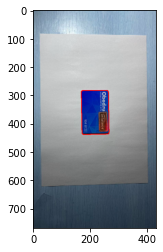

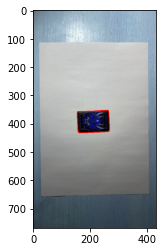

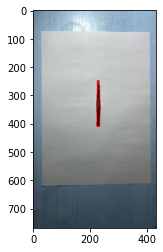

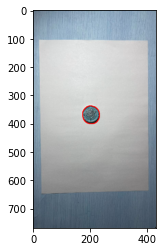

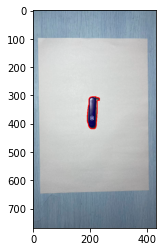

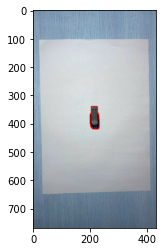

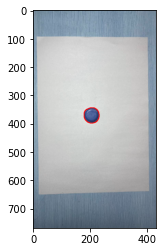

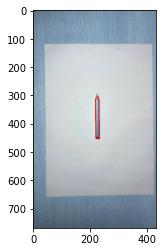

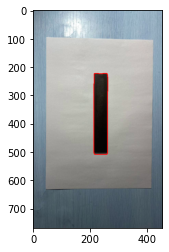

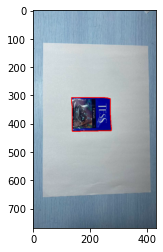

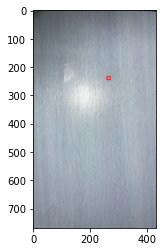

In [18]:
path_to_folder = "images/objects"
for image in listdir(path_to_folder):
    image_path = path.join(path_to_folder, image)
    img = cv2.imread(image_path)
    img = compress_image(img, 60)
    result = ObjectBase(img, image_path)
    processed_items = [(result.mask * 255).astype("uint8"), result.contour_image]
    plt.imshow(result.contour_image)
    plt.show()

## Обработка датасета

Определяем границы многоугольника и объектов

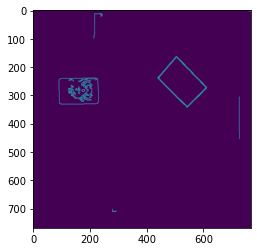

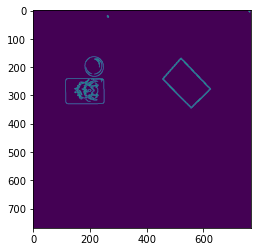

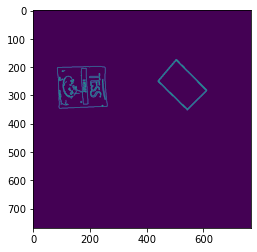

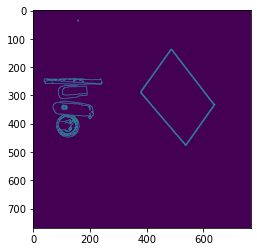

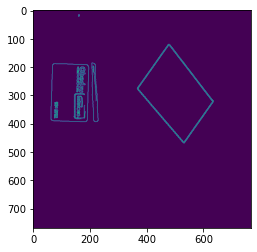

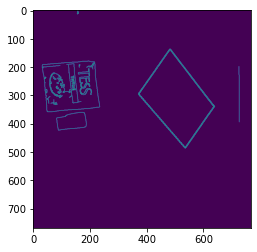

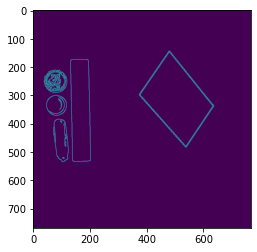

In [19]:
path_to_folder = "images/dataset"
polygon = []
object_set= []
for image_path in listdir(path_to_folder):
    image_full_path = path.join(path_to_folder, image_path)
    if path.splitext(image_path)[1] == ".jpg":
        img = cv2.imread(image_full_path, cv2.COLOR_BGR2GRAY)
        img = compress_image(img, 60)
        pol, obj_set = find_polygon_and_objects(img)
        polygon.append(pol)
        object_set.append(obj_set)

Посмотрим последнее изображение подробнее. 

Получили объекты многоугольника и предметов (ObjectBase), с особыми точками и масками

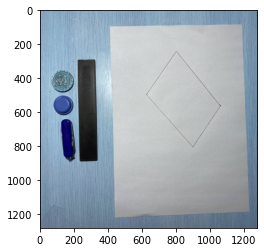

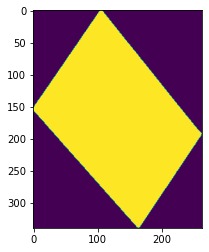

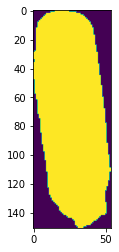

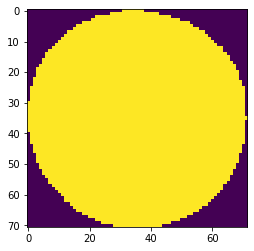

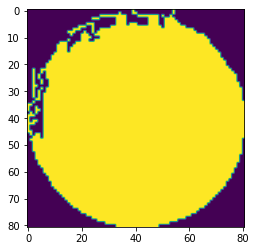

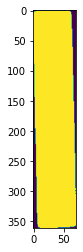

In [20]:
n = 6
plt.imshow(cv2.imread("images/dataset/6.jpg", cv2.COLOR_BGR2GRAY))
plt.show()
plt.imshow(polygon[n].mask)
plt.show()

for obj in object_set[n]:
    plt.imshow(obj.mask)
    plt.show()

Аналогично с 4-ым изображением:

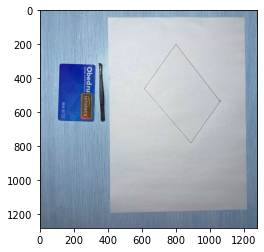

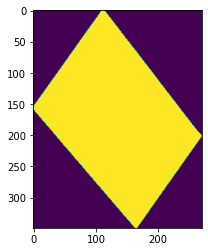

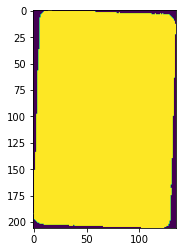

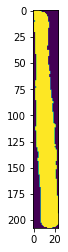

In [21]:
n = 4
plt.imshow(cv2.imread("images/dataset/4.jpg", cv2.COLOR_BGR2GRAY))
plt.show()
plt.imshow(polygon[n].mask)
plt.show()

for obj in object_set[n]:
    plt.imshow(obj.mask)
    plt.show()